In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma

In [124]:
#priors
Phi_s=10**(-3)
logMass_s=8.4
M_star=10**logMass_s
a=-1.19
beta2=0.5116394637708428
alpha_moy=0.12
alpha=alpha_moy
chi=0.5

def Dist_BH(M,d):
    #M=(645*10*alpha_moy)/(f*0.1)
    return (1/(d+1))**(beta2)*Phi_s*(M/M_star)**(1+a)*np.exp(1-(M/M_star))

def P_M(M):
    #M=(645*10*alpha_moy)/(f*0.1)
    return Phi_s*(M/(M_star))**(1+a)*np.exp(1-(M/M_star))

#Amplitudeh_0
m=1
def chi_f(alpha_f):
    return (4*alpha_f*m)/(4*alpha_f*m+m)
    
def dist_z(z):
    return Phi_s*(M_star/z)**(2-beta2)*np.exp(1)*gamma(a-beta2+3)


C1=(8e-28/10)*(alpha/0.1)**7*(10**6)*((chi-0.45)/0.1)
def P_h0(x):
    return ((1/(C1))*dist_z(x/C1))
def P_h0bis(x):
    return (1/C1)*Phi_s*(M_star/(x/C1))**(2-beta2)*np.exp(1)*gamma(a-beta2+3)

#frequency
C2=(645*10*alpha_moy)/0.1
def P_f0(x):
    return (C2/x**2)*P_M((C2/x))
    


#frequency derivative

C3=3e-14*10**2*(alpha/0.1)**19*chi**2
def P_f0dot(x):
    return (np.sqrt(C3)/2)*(1/x**(3/2))*P_M(np.sqrt(C3/x))


    

[2.69830336e+36 8.76456242e+34 2.84688354e+33 9.24717690e+31
 3.00364519e+30 9.75636621e+28 3.16903880e+27 1.02935937e+26]


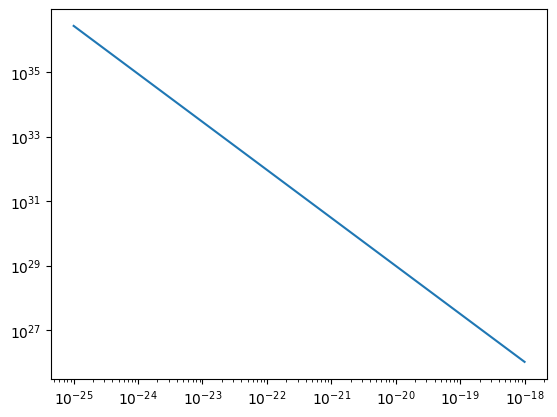

In [125]:
tab_h0=np.array([10**(-25),10**(-24),10**(-23),10**(-22),10**(-21),10**(-20), 10**(-19), 10**(-18)])
plt.loglog(tab_h0,P_h0(tab_h0))
print(P_h0(tab_h0))
#plt.figure()
#plt.semilogx(tab_h0,P_h0bis(tab_h0))

In [126]:
def integrand(x):
    return P_h0(x)

  
def mc_integrate(func, a, b,n=50000):
    # Monte Carlo integration between x1 and x2 of given function from a to b
    
    vals = np.random.uniform(a, b, n)
    y = [func(val) for val in vals]
    
    y_mean = np.sum(y)/n
    integ = (b-a) * y_mean
    
    return integ

print(mc_integrate(integrand,10**(-25),10**(-18)))
K=mc_integrate(integrand,10**(-25),10**(-18))
#K=integr.quad(P_h0,0,8e7)[0]
#import scipy.integrate as integr
#print(integr.quad(P_h0,0,np.inf))
#print(np.abs(K))

117982115171.16644


[9.90243150e+24 3.21648337e+23 1.04477019e+22 3.39359677e+20
 1.10229973e+19 3.58046280e+17 1.16299709e+16 3.77761847e+14]


Text(0, 0.5, '$p(h_0)$')

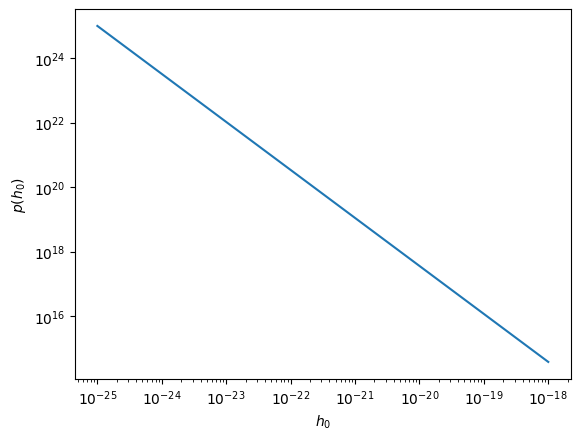

In [127]:
plt.loglog(tab_h0,P_h0(tab_h0)/(K))
print(P_h0(tab_h0)/(K))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')

In [128]:
def integration1d(fonction,a,b,N):
    x = a+(b-a)*np.random.random_sample(N)
    p = 1.0/(b-a)
    f = fonction(x)
    moyenne = f.sum()/(N*p)
    g = f*f
    #variance = g.sum()*1.0/(N*p*p)-moyenne*moyenne
    return (moyenne)

integrale = integration1d(P_h0,10**(-25),10**(-18),1000)

print(integrale)

4797230671.763507


[6.43279503e+08 1.98148482e+08 9.75927027e+07 5.87292047e+07
 3.95177791e+07 2.85564902e+07 2.16832437e+07 1.70747227e+07
 1.38260113e+07 1.14450924e+07 9.64510192e+06 8.24928722e+06
 7.14374472e+06 6.25229255e+06 5.52235700e+06 4.91667253e+06
 4.40820618e+06 3.97694766e+06 3.60781896e+06 3.28927772e+06
 3.01236243e+06 2.77002649e+06 2.55666500e+06 2.36777307e+06
 2.19969530e+06 2.04943959e+06 1.91453708e+06 1.79293549e+06
 1.68291712e+06 1.58303509e+06 1.49206346e+06 1.40895768e+06
 1.33282319e+06 1.26289013e+06 1.19849293e+06 1.13905373e+06
 1.08406881e+06 1.03309736e+06 9.85752237e+05 9.41692296e+05
 9.00615921e+05 8.62255635e+05 8.26373538e+05 7.92757440e+05
 7.61217589e+05 7.31583856e+05 7.03703343e+05 6.77438315e+05
 6.52664423e+05 6.29269159e+05]


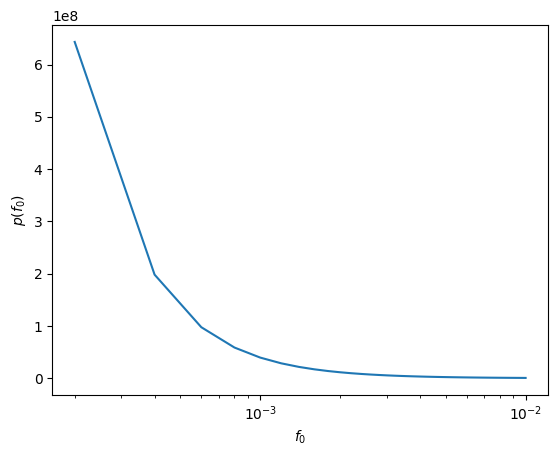

In [133]:
tab_f=np.linspace(2*10**(-4),10**(-2),50)
#K2_norm=integration1d(P_f0,0,1e8,1000)
#print('Normalization constant of p_f0=',K2_norm)
plt.semilogx(tab_f,P_f0(tab_f))
plt.xlabel(r'$f_0$')
plt.ylabel(r'$p(f_0)$')
print(P_f0(tab_f))

[0.42171286 0.15924643 0.09008687 0.06013434 0.04395052 0.03401844
 0.02739391 0.02270782 0.01924448 0.01659651 0.01451644 0.01284598
 0.01147959 0.01034444 0.00938877 0.00857488 0.00787474 0.00726706
 0.00673547 0.00626714 0.00585192 0.00548167 0.00514979 0.00485087
 0.00458048 0.0043349  0.00411103 0.00390625 0.00371833 0.00354537
 0.00338574 0.00323803 0.00310102 0.00297364 0.00285497 0.00274418
 0.00264054 0.00254344 0.00245229 0.00236659 0.00228589 0.00220979
 0.00213793 0.00206998 0.00200564 0.00194465 0.00188677 0.00183178
 0.00177947 0.00172967]


Text(0, 0.5, '$p(\\dot{f_0})$')

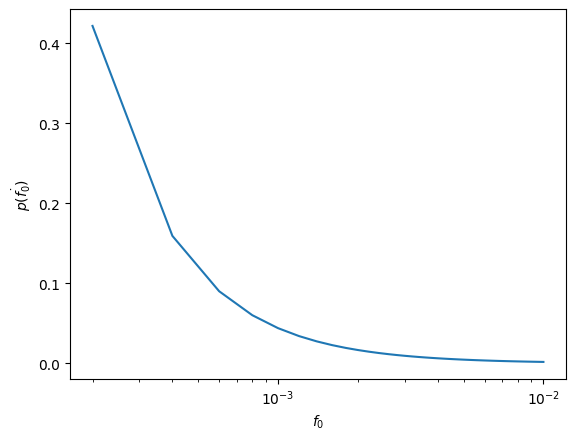

In [137]:
tab_f=np.linspace(2*10**(-4),10**(-2),50)
plt.semilogx(tab_f,P_f0dot(tab_f))
print(P_f0dot(tab_f))
plt.xlabel(r'$f_0$')
plt.ylabel(r'$p(\dot{f_0})$')
#K3_norm=integration1d(P_f0,0,1,1000)
#print('Normalization constant of p_f0dot=',K3_norm)